## Q1. What is the mathematical formula for a linear SVM?
A linear SVM tries to find a hyperplane that separates the data points into classes with the maximum margin. The equation of the hyperplane is:  

$$ w^T x + b = 0 $$  

Where:  
- \( w \) is the weight vector (determines the orientation of the hyperplane).  
- \( x \) is the feature vector.  
- \( b \) is the bias (determines the offset of the hyperplane from the origin).

---

## Q2. What is the objective function of a linear SVM?
The objective of SVM is to maximize the margin (distance between the hyperplane and the nearest data points, known as support vectors) while minimizing classification errors.  

For a hard-margin SVM, the optimization problem is:  

**Objective Function:**  
$$ \min \frac{1}{2} ||w||^2 $$  

**Subject to:**  
$$ y_i (w^T x_i + b) \geq 1, \, \forall i $$  

For a soft-margin SVM, the objective function includes a regularization term to allow some misclassifications:  

$$ \min \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i $$  

Subject to:  
$$ y_i (w^T x_i + b) \geq 1 - \xi_i, \, \xi_i \geq 0 $$  

Where:  
- \( \xi_i \) are the slack variables (measure misclassification).  
- \( C \) is the regularization parameter (controls the trade-off between maximizing the margin and minimizing classification errors).

---

## Q3. What is the kernel trick in SVM?
The kernel trick is a technique used in SVMs to handle non-linear data. It implicitly maps the input data into a higher-dimensional space where the classes become linearly separable without explicitly computing the transformation.  

Instead of computing \( \phi(x) \) (the transformation), the kernel function \( K(x_i, x_j) \) computes the dot product in the transformed space:  

$$ K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $$  

Popular kernel functions:  
- Linear: \( K(x_i, x_j) = x_i^T x_j \)  
- Polynomial: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)  
- Radial Basis Function (RBF): \( K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) \)  

---

## Q4. What is the role of support vectors in SVM? Explain with an example.
Support vectors are the data points that lie closest to the decision boundary (margin). These points are critical in defining the position and orientation of the hyperplane. Removing or altering support vectors can change the hyperplane entirely, while non-support vectors do not affect it.

**Example:**  
Consider two classes (red and blue). If the closest points from each class to the hyperplane are removed, the decision boundary will shift, leading to different classification results.

---

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM
We will create a visual illustration using Python and Matplotlib to show:  
- The hyperplane separating the classes.  
- Marginal planes (lines representing the margin).  
- Hard margin: No misclassified points.  
- Soft margin: Some misclassified points allowed.

---

## Q6. SVM Implementation through Iris Dataset
Below is the implementation of an SVM classifier using the Iris dataset.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
#Dependent and Independent Features
X = df.iloc[:,:-1]
y = df.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

<Axes: >

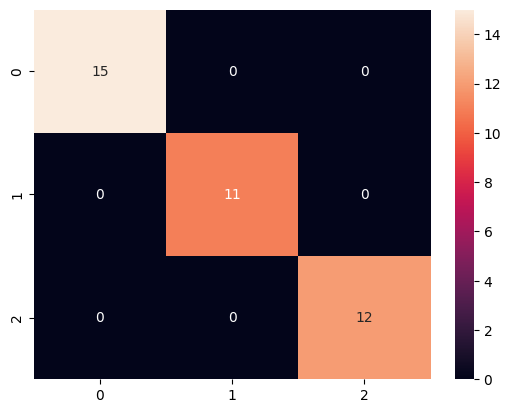

In [11]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

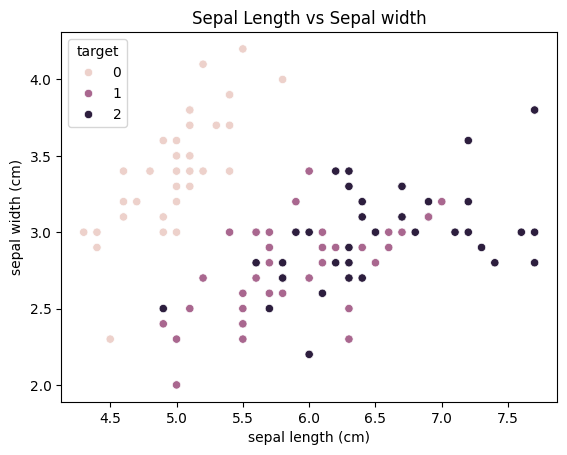

In [12]:
# Plot the decision boundaries of the trained model using two of the features
df_train = pd.concat([X_train,y_train],axis=1)
sns.scatterplot(data = df_train, x = 'sepal length (cm)',y='sepal width (cm)',hue = y_train)
plt.title('Sepal Length vs Sepal width')
plt.show()

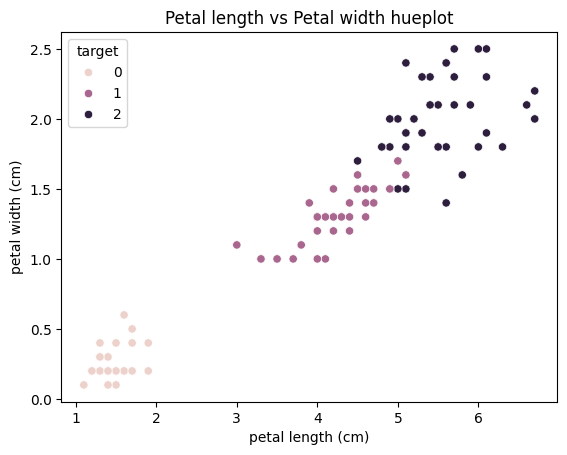

In [13]:
# Plot the decision boundaries of the trained model using two of the features
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.concat([X_train,y_train],axis=1)
sns.scatterplot(data = df_train, x = 'petal length (cm)',y='petal width (cm)',hue= y_train)
plt.title('Petal length vs Petal width hueplot')
plt.show()

In [14]:
from sklearn.metrics import classification_report
C = [1,2,3,4,5,6,7,8,9,10]
for i in C:
    model = SVC(kernel='linear', C=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'C Value : {i}\n')
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print(classification_report(y_test,y_pred))
    print('\n-----------------------------------------\n')

C Value : 1

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


-----------------------------------------

C Value : 2

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


-----------------------------------------

C Value : 3

Accuracy : 1.0

              precision    recall  f1-score   support

        